## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  75.442056  1414.003062  0.580130  7.835273  1.533039
1  21.221688  1301.273744  0.573472  2.580264  1.530017
2  92.495320  1040.097203  0.719508  3.146299  1.478314
3  32.710804   166.573353  0.046806  1.489424  0.258381
4  11.586110  1128.520918  0.631463  6.358872  1.678582


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.20401 | train_mse: 8.90509 | train_mae: 1.89413 |  0:00:00s
epoch 1  | loss: 0.60035 | train_mse: 3.54292 | train_mae: 1.30904 |  0:00:00s
epoch 2  | loss: 0.44307 | train_mse: 1.60469 | train_mae: 0.97184 |  0:00:00s


epoch 3  | loss: 0.42362 | train_mse: 1.16089 | train_mae: 0.77266 |  0:00:00s
epoch 4  | loss: 0.40676 | train_mse: 1.33747 | train_mae: 0.78738 |  0:00:00s
epoch 5  | loss: 0.44761 | train_mse: 1.27192 | train_mae: 0.76501 |  0:00:00s


epoch 6  | loss: 0.30623 | train_mse: 0.64405 | train_mae: 0.60627 |  0:00:00s
epoch 7  | loss: 0.3777  | train_mse: 0.78657 | train_mae: 0.64976 |  0:00:00s
epoch 8  | loss: 0.41651 | train_mse: 0.96362 | train_mae: 0.72976 |  0:00:00s
epoch 9  | loss: 0.28012 | train_mse: 1.05044 | train_mae: 0.74384 |  0:00:00s


epoch 10 | loss: 0.33823 | train_mse: 0.6681  | train_mae: 0.61728 |  0:00:00s
epoch 11 | loss: 0.26971 | train_mse: 0.47196 | train_mae: 0.49323 |  0:00:00s
epoch 12 | loss: 0.325   | train_mse: 0.41133 | train_mae: 0.47045 |  0:00:01s


epoch 13 | loss: 0.24547 | train_mse: 0.48206 | train_mae: 0.51083 |  0:00:01s
epoch 14 | loss: 0.20252 | train_mse: 0.67093 | train_mae: 0.58803 |  0:00:01s
epoch 15 | loss: 0.29511 | train_mse: 1.04994 | train_mae: 0.71893 |  0:00:01s


epoch 16 | loss: 0.26325 | train_mse: 0.65925 | train_mae: 0.57966 |  0:00:01s
epoch 17 | loss: 0.3746  | train_mse: 0.35896 | train_mae: 0.44614 |  0:00:01s
epoch 18 | loss: 0.24849 | train_mse: 0.35952 | train_mae: 0.45096 |  0:00:01s


epoch 19 | loss: 0.25415 | train_mse: 0.48862 | train_mae: 0.52268 |  0:00:01s
epoch 20 | loss: 0.28292 | train_mse: 0.5594  | train_mae: 0.5623  |  0:00:01s
epoch 21 | loss: 0.4527  | train_mse: 0.65381 | train_mae: 0.5514  |  0:00:01s


epoch 22 | loss: 0.19777 | train_mse: 0.30844 | train_mae: 0.41515 |  0:00:01s
epoch 23 | loss: 0.22994 | train_mse: 0.19003 | train_mae: 0.35333 |  0:00:01s
epoch 24 | loss: 0.30013 | train_mse: 0.20023 | train_mae: 0.34005 |  0:00:02s


epoch 25 | loss: 0.30647 | train_mse: 0.20405 | train_mae: 0.34854 |  0:00:02s
epoch 26 | loss: 0.24856 | train_mse: 0.22948 | train_mae: 0.37423 |  0:00:02s
epoch 27 | loss: 0.26276 | train_mse: 0.17669 | train_mae: 0.3168  |  0:00:02s


epoch 28 | loss: 0.20286 | train_mse: 0.20225 | train_mae: 0.33447 |  0:00:02s
epoch 29 | loss: 0.16314 | train_mse: 0.1795  | train_mae: 0.31919 |  0:00:02s


epoch 30 | loss: 0.21286 | train_mse: 0.19703 | train_mae: 0.32668 |  0:00:02s
epoch 31 | loss: 0.23079 | train_mse: 0.17696 | train_mae: 0.33364 |  0:00:03s
epoch 32 | loss: 0.21795 | train_mse: 0.1487  | train_mae: 0.30769 |  0:00:03s


epoch 33 | loss: 0.16969 | train_mse: 0.13622 | train_mae: 0.29755 |  0:00:03s
epoch 34 | loss: 0.37292 | train_mse: 0.19764 | train_mae: 0.34754 |  0:00:03s
epoch 35 | loss: 0.28902 | train_mse: 0.17121 | train_mae: 0.32152 |  0:00:03s


epoch 36 | loss: 0.23956 | train_mse: 0.16183 | train_mae: 0.30396 |  0:00:03s
epoch 37 | loss: 0.27702 | train_mse: 0.16205 | train_mae: 0.31355 |  0:00:03s
epoch 38 | loss: 0.23606 | train_mse: 0.20038 | train_mae: 0.3354  |  0:00:03s
epoch 39 | loss: 0.34825 | train_mse: 0.20683 | train_mae: 0.33639 |  0:00:03s


epoch 40 | loss: 0.27415 | train_mse: 0.24839 | train_mae: 0.36895 |  0:00:03s
epoch 41 | loss: 0.27016 | train_mse: 0.20477 | train_mae: 0.33795 |  0:00:03s
epoch 42 | loss: 0.25346 | train_mse: 0.1751  | train_mae: 0.32241 |  0:00:03s


epoch 43 | loss: 0.21914 | train_mse: 0.15714 | train_mae: 0.30386 |  0:00:03s
epoch 44 | loss: 0.2542  | train_mse: 0.14525 | train_mae: 0.29666 |  0:00:03s
epoch 45 | loss: 0.24713 | train_mse: 0.15874 | train_mae: 0.30634 |  0:00:04s


epoch 46 | loss: 0.20114 | train_mse: 0.18925 | train_mae: 0.32876 |  0:00:04s
epoch 47 | loss: 0.25808 | train_mse: 0.16024 | train_mae: 0.30526 |  0:00:04s
epoch 48 | loss: 0.28293 | train_mse: 0.14995 | train_mae: 0.29193 |  0:00:04s
epoch 49 | loss: 0.26082 | train_mse: 0.16129 | train_mae: 0.31214 |  0:00:04s


epoch 50 | loss: 0.18137 | train_mse: 0.14389 | train_mae: 0.29294 |  0:00:04s
epoch 51 | loss: 0.23641 | train_mse: 0.1441  | train_mae: 0.28875 |  0:00:04s
epoch 52 | loss: 0.38504 | train_mse: 0.15347 | train_mae: 0.29932 |  0:00:04s


epoch 53 | loss: 0.46245 | train_mse: 0.14766 | train_mae: 0.28338 |  0:00:04s
epoch 54 | loss: 0.15289 | train_mse: 0.21856 | train_mae: 0.37269 |  0:00:04s
epoch 55 | loss: 0.17728 | train_mse: 0.29965 | train_mae: 0.44082 |  0:00:04s
epoch 56 | loss: 0.23562 | train_mse: 0.23831 | train_mae: 0.38149 |  0:00:04s


epoch 57 | loss: 0.21574 | train_mse: 0.1881  | train_mae: 0.31561 |  0:00:04s
epoch 58 | loss: 0.21227 | train_mse: 0.16998 | train_mae: 0.31111 |  0:00:04s
epoch 59 | loss: 0.24858 | train_mse: 0.1852  | train_mae: 0.34584 |  0:00:04s
epoch 60 | loss: 0.17049 | train_mse: 0.25783 | train_mae: 0.4003  |  0:00:05s


epoch 61 | loss: 0.21719 | train_mse: 0.26481 | train_mae: 0.38661 |  0:00:05s
epoch 62 | loss: 0.29571 | train_mse: 0.21639 | train_mae: 0.33919 |  0:00:05s
epoch 63 | loss: 0.15476 | train_mse: 0.15305 | train_mae: 0.2963  |  0:00:05s
epoch 64 | loss: 0.19455 | train_mse: 0.12489 | train_mae: 0.27074 |  0:00:05s


epoch 65 | loss: 0.15263 | train_mse: 0.13    | train_mae: 0.28872 |  0:00:05s
epoch 66 | loss: 0.22328 | train_mse: 0.12704 | train_mae: 0.2783  |  0:00:05s
epoch 67 | loss: 0.17993 | train_mse: 0.1628  | train_mae: 0.2926  |  0:00:05s
epoch 68 | loss: 0.21012 | train_mse: 0.15872 | train_mae: 0.30235 |  0:00:05s


epoch 69 | loss: 0.15831 | train_mse: 0.12224 | train_mae: 0.26907 |  0:00:05s
epoch 70 | loss: 0.1315  | train_mse: 0.11494 | train_mae: 0.2588  |  0:00:05s
epoch 71 | loss: 0.28332 | train_mse: 0.15123 | train_mae: 0.2848  |  0:00:05s


epoch 72 | loss: 0.19501 | train_mse: 0.1563  | train_mae: 0.28863 |  0:00:05s
epoch 73 | loss: 0.20686 | train_mse: 0.09706 | train_mae: 0.24428 |  0:00:05s
epoch 74 | loss: 0.12805 | train_mse: 0.11025 | train_mae: 0.2542  |  0:00:06s
epoch 75 | loss: 0.27699 | train_mse: 0.16853 | train_mae: 0.2965  |  0:00:06s


epoch 76 | loss: 0.23441 | train_mse: 0.20272 | train_mae: 0.31684 |  0:00:06s
epoch 77 | loss: 0.20255 | train_mse: 0.15669 | train_mae: 0.30139 |  0:00:06s
epoch 78 | loss: 0.17091 | train_mse: 0.11753 | train_mae: 0.26484 |  0:00:06s
epoch 79 | loss: 0.23149 | train_mse: 0.09491 | train_mae: 0.23475 |  0:00:06s


epoch 80 | loss: 0.23758 | train_mse: 0.09638 | train_mae: 0.24126 |  0:00:06s
epoch 81 | loss: 0.11606 | train_mse: 0.10295 | train_mae: 0.24774 |  0:00:06s
epoch 82 | loss: 0.19088 | train_mse: 0.15718 | train_mae: 0.29692 |  0:00:06s


epoch 83 | loss: 0.21109 | train_mse: 0.16339 | train_mae: 0.30661 |  0:00:06s
epoch 84 | loss: 0.12935 | train_mse: 0.16167 | train_mae: 0.31392 |  0:00:06s
epoch 85 | loss: 0.15995 | train_mse: 0.13081 | train_mae: 0.27391 |  0:00:06s
epoch 86 | loss: 0.18284 | train_mse: 0.10499 | train_mae: 0.24348 |  0:00:06s


epoch 87 | loss: 0.1705  | train_mse: 0.11166 | train_mae: 0.25708 |  0:00:06s
epoch 88 | loss: 0.1827  | train_mse: 0.13164 | train_mae: 0.27177 |  0:00:06s
epoch 89 | loss: 0.16101 | train_mse: 0.1244  | train_mae: 0.25768 |  0:00:07s
epoch 90 | loss: 0.15607 | train_mse: 0.10865 | train_mae: 0.249   |  0:00:07s


epoch 91 | loss: 0.26322 | train_mse: 0.08998 | train_mae: 0.23308 |  0:00:07s
epoch 92 | loss: 0.13251 | train_mse: 0.09908 | train_mae: 0.23536 |  0:00:07s
epoch 93 | loss: 0.19649 | train_mse: 0.08689 | train_mae: 0.232   |  0:00:07s


epoch 94 | loss: 0.13938 | train_mse: 0.07895 | train_mae: 0.21611 |  0:00:07s
epoch 95 | loss: 0.12226 | train_mse: 0.08311 | train_mae: 0.22896 |  0:00:07s
epoch 96 | loss: 0.0939  | train_mse: 0.07973 | train_mae: 0.22226 |  0:00:07s


epoch 97 | loss: 0.1323  | train_mse: 0.07509 | train_mae: 0.20855 |  0:00:07s
epoch 98 | loss: 0.12229 | train_mse: 0.07579 | train_mae: 0.21163 |  0:00:07s
epoch 99 | loss: 0.14166 | train_mse: 0.09398 | train_mae: 0.24047 |  0:00:07s
epoch 100| loss: 0.15032 | train_mse: 0.10911 | train_mae: 0.24851 |  0:00:07s


epoch 101| loss: 0.14467 | train_mse: 0.12134 | train_mae: 0.25483 |  0:00:07s
epoch 102| loss: 0.15904 | train_mse: 0.09234 | train_mae: 0.23225 |  0:00:07s
epoch 103| loss: 0.11779 | train_mse: 0.08854 | train_mae: 0.22988 |  0:00:08s
epoch 104| loss: 0.09768 | train_mse: 0.10285 | train_mae: 0.25419 |  0:00:08s


epoch 105| loss: 0.26093 | train_mse: 0.11482 | train_mae: 0.26674 |  0:00:08s
epoch 106| loss: 0.14459 | train_mse: 0.0845  | train_mae: 0.22712 |  0:00:08s
epoch 107| loss: 0.14944 | train_mse: 0.07075 | train_mae: 0.20815 |  0:00:08s


epoch 108| loss: 0.11378 | train_mse: 0.06573 | train_mae: 0.20128 |  0:00:08s
epoch 109| loss: 0.13082 | train_mse: 0.06726 | train_mae: 0.20324 |  0:00:08s
epoch 110| loss: 0.13383 | train_mse: 0.0849  | train_mae: 0.23044 |  0:00:08s


epoch 111| loss: 0.09107 | train_mse: 0.09237 | train_mae: 0.23865 |  0:00:08s
epoch 112| loss: 0.22957 | train_mse: 0.10755 | train_mae: 0.24341 |  0:00:08s
epoch 113| loss: 0.12955 | train_mse: 0.12494 | train_mae: 0.23527 |  0:00:08s
epoch 114| loss: 0.17797 | train_mse: 0.10471 | train_mae: 0.22472 |  0:00:08s


epoch 115| loss: 0.21572 | train_mse: 0.07395 | train_mae: 0.20565 |  0:00:08s
epoch 116| loss: 0.10287 | train_mse: 0.10833 | train_mae: 0.22841 |  0:00:08s
epoch 117| loss: 0.26366 | train_mse: 0.0966  | train_mae: 0.22947 |  0:00:08s
epoch 118| loss: 0.16377 | train_mse: 0.08406 | train_mae: 0.21517 |  0:00:09s


epoch 119| loss: 0.10926 | train_mse: 0.08433 | train_mae: 0.21002 |  0:00:09s
epoch 120| loss: 0.11593 | train_mse: 0.08581 | train_mae: 0.20801 |  0:00:09s
epoch 121| loss: 0.15014 | train_mse: 0.097   | train_mae: 0.2212  |  0:00:09s
epoch 122| loss: 0.11715 | train_mse: 0.09899 | train_mae: 0.22213 |  0:00:09s


epoch 123| loss: 0.13883 | train_mse: 0.09718 | train_mae: 0.22947 |  0:00:09s
epoch 124| loss: 0.11729 | train_mse: 0.07377 | train_mae: 0.20162 |  0:00:09s
epoch 125| loss: 0.17242 | train_mse: 0.07562 | train_mae: 0.20316 |  0:00:09s


epoch 126| loss: 0.12471 | train_mse: 0.08095 | train_mae: 0.20973 |  0:00:09s
epoch 127| loss: 0.11021 | train_mse: 0.10152 | train_mae: 0.21816 |  0:00:09s
epoch 128| loss: 0.21492 | train_mse: 0.13149 | train_mae: 0.2359  |  0:00:09s
epoch 129| loss: 0.15378 | train_mse: 0.126   | train_mae: 0.24464 |  0:00:09s


epoch 130| loss: 0.15728 | train_mse: 0.09161 | train_mae: 0.2277  |  0:00:09s
epoch 131| loss: 0.09218 | train_mse: 0.10628 | train_mae: 0.24373 |  0:00:09s
epoch 132| loss: 0.17917 | train_mse: 0.11608 | train_mae: 0.24324 |  0:00:09s
epoch 133| loss: 0.13401 | train_mse: 0.11081 | train_mae: 0.23545 |  0:00:10s


epoch 134| loss: 0.18544 | train_mse: 0.08309 | train_mae: 0.21596 |  0:00:10s
epoch 135| loss: 0.15584 | train_mse: 0.08975 | train_mae: 0.23057 |  0:00:10s
epoch 136| loss: 0.17617 | train_mse: 0.087   | train_mae: 0.22757 |  0:00:10s
epoch 137| loss: 0.16375 | train_mse: 0.09885 | train_mae: 0.23966 |  0:00:10s


epoch 138| loss: 0.13352 | train_mse: 0.09612 | train_mae: 0.2394  |  0:00:10s
epoch 139| loss: 0.15172 | train_mse: 0.0912  | train_mae: 0.22989 |  0:00:10s
epoch 140| loss: 0.16065 | train_mse: 0.10065 | train_mae: 0.23599 |  0:00:10s
epoch 141| loss: 0.28628 | train_mse: 0.13696 | train_mae: 0.27336 |  0:00:10s


epoch 142| loss: 0.14009 | train_mse: 0.14042 | train_mae: 0.2664  |  0:00:10s
epoch 143| loss: 0.1562  | train_mse: 0.15018 | train_mae: 0.28042 |  0:00:10s
epoch 144| loss: 0.16634 | train_mse: 0.10378 | train_mae: 0.24807 |  0:00:10s
epoch 145| loss: 0.1236  | train_mse: 0.07769 | train_mae: 0.2191  |  0:00:10s


epoch 146| loss: 0.09644 | train_mse: 0.07021 | train_mae: 0.21164 |  0:00:10s
epoch 147| loss: 0.12795 | train_mse: 0.07803 | train_mae: 0.21715 |  0:00:11s
epoch 148| loss: 0.13193 | train_mse: 0.08974 | train_mae: 0.23449 |  0:00:11s
epoch 149| loss: 0.21072 | train_mse: 0.06932 | train_mae: 0.20983 |  0:00:11s


epoch 150| loss: 0.09368 | train_mse: 0.06827 | train_mae: 0.20697 |  0:00:11s
epoch 151| loss: 0.13832 | train_mse: 0.06188 | train_mae: 0.18836 |  0:00:11s
epoch 152| loss: 0.15014 | train_mse: 0.07157 | train_mae: 0.20463 |  0:00:11s


epoch 153| loss: 0.14269 | train_mse: 0.10496 | train_mae: 0.23799 |  0:00:11s
epoch 154| loss: 0.19559 | train_mse: 0.09431 | train_mae: 0.23858 |  0:00:11s
epoch 155| loss: 0.10035 | train_mse: 0.08715 | train_mae: 0.23456 |  0:00:11s


epoch 156| loss: 0.11707 | train_mse: 0.10878 | train_mae: 0.25213 |  0:00:11s
epoch 157| loss: 0.18485 | train_mse: 0.09837 | train_mae: 0.21838 |  0:00:11s
epoch 158| loss: 0.1066  | train_mse: 0.07531 | train_mae: 0.20103 |  0:00:11s


epoch 159| loss: 0.10075 | train_mse: 0.06144 | train_mae: 0.19665 |  0:00:11s
epoch 160| loss: 0.08746 | train_mse: 0.06066 | train_mae: 0.19317 |  0:00:11s
epoch 161| loss: 0.16548 | train_mse: 0.09656 | train_mae: 0.21594 |  0:00:11s
epoch 162| loss: 0.08189 | train_mse: 0.08946 | train_mae: 0.21222 |  0:00:12s


epoch 163| loss: 0.16759 | train_mse: 0.08296 | train_mae: 0.21385 |  0:00:12s
epoch 164| loss: 0.14546 | train_mse: 0.0841  | train_mae: 0.22193 |  0:00:12s
epoch 165| loss: 0.09374 | train_mse: 0.09552 | train_mae: 0.22767 |  0:00:12s
epoch 166| loss: 0.1204  | train_mse: 0.10063 | train_mae: 0.21917 |  0:00:12s


epoch 167| loss: 0.1315  | train_mse: 0.09791 | train_mae: 0.21304 |  0:00:12s
epoch 168| loss: 0.21001 | train_mse: 0.10968 | train_mae: 0.2269  |  0:00:12s
epoch 169| loss: 0.13074 | train_mse: 0.10117 | train_mae: 0.23465 |  0:00:12s


epoch 170| loss: 0.09456 | train_mse: 0.08251 | train_mae: 0.21865 |  0:00:12s
epoch 171| loss: 0.15045 | train_mse: 0.0763  | train_mae: 0.21154 |  0:00:12s
epoch 172| loss: 0.21116 | train_mse: 0.06483 | train_mae: 0.18935 |  0:00:12s
epoch 173| loss: 0.14714 | train_mse: 0.06812 | train_mae: 0.19107 |  0:00:12s


epoch 174| loss: 0.08308 | train_mse: 0.07525 | train_mae: 0.19124 |  0:00:12s
epoch 175| loss: 0.11607 | train_mse: 0.0902  | train_mae: 0.21011 |  0:00:12s
epoch 176| loss: 0.13174 | train_mse: 0.12279 | train_mae: 0.24866 |  0:00:12s
epoch 177| loss: 0.19121 | train_mse: 0.12625 | train_mae: 0.25516 |  0:00:13s


epoch 178| loss: 0.19712 | train_mse: 0.08891 | train_mae: 0.22021 |  0:00:13s
epoch 179| loss: 0.13246 | train_mse: 0.07907 | train_mae: 0.20965 |  0:00:13s
epoch 180| loss: 0.10742 | train_mse: 0.09042 | train_mae: 0.23564 |  0:00:13s


epoch 181| loss: 0.17417 | train_mse: 0.10359 | train_mae: 0.24156 |  0:00:13s
epoch 182| loss: 0.13941 | train_mse: 0.09043 | train_mae: 0.22888 |  0:00:13s
epoch 183| loss: 0.15962 | train_mse: 0.07469 | train_mae: 0.21304 |  0:00:13s


epoch 184| loss: 0.08562 | train_mse: 0.06437 | train_mae: 0.19846 |  0:00:13s
epoch 185| loss: 0.08901 | train_mse: 0.06216 | train_mae: 0.19487 |  0:00:13s
epoch 186| loss: 0.09746 | train_mse: 0.06525 | train_mae: 0.20128 |  0:00:13s
epoch 187| loss: 0.09493 | train_mse: 0.07564 | train_mae: 0.20392 |  0:00:13s


epoch 188| loss: 0.08394 | train_mse: 0.07116 | train_mae: 0.19091 |  0:00:13s
epoch 189| loss: 0.07158 | train_mse: 0.06077 | train_mae: 0.18276 |  0:00:13s
epoch 190| loss: 0.15464 | train_mse: 0.05669 | train_mae: 0.18005 |  0:00:13s
epoch 191| loss: 0.10958 | train_mse: 0.06096 | train_mae: 0.18657 |  0:00:14s


epoch 192| loss: 0.09028 | train_mse: 0.07047 | train_mae: 0.20222 |  0:00:14s
epoch 193| loss: 0.14506 | train_mse: 0.07632 | train_mae: 0.21278 |  0:00:14s
epoch 194| loss: 0.27958 | train_mse: 0.05988 | train_mae: 0.18911 |  0:00:14s
epoch 195| loss: 0.09603 | train_mse: 0.05974 | train_mae: 0.18756 |  0:00:14s


epoch 196| loss: 0.15696 | train_mse: 0.05465 | train_mae: 0.1861  |  0:00:14s
epoch 197| loss: 0.12199 | train_mse: 0.05419 | train_mae: 0.185   |  0:00:14s
epoch 198| loss: 0.14644 | train_mse: 0.05426 | train_mae: 0.18444 |  0:00:14s


epoch 199| loss: 0.28613 | train_mse: 0.05661 | train_mae: 0.19172 |  0:00:14s
epoch 200| loss: 0.14619 | train_mse: 0.06089 | train_mae: 0.20202 |  0:00:14s
epoch 201| loss: 0.11854 | train_mse: 0.06143 | train_mae: 0.19947 |  0:00:14s
epoch 202| loss: 0.1601  | train_mse: 0.0569  | train_mae: 0.18591 |  0:00:14s


epoch 203| loss: 0.08617 | train_mse: 0.05961 | train_mae: 0.18753 |  0:00:14s
epoch 204| loss: 0.09267 | train_mse: 0.07074 | train_mae: 0.20746 |  0:00:14s
epoch 205| loss: 0.18959 | train_mse: 0.0655  | train_mae: 0.20334 |  0:00:14s
epoch 206| loss: 0.20507 | train_mse: 0.06547 | train_mae: 0.20144 |  0:00:15s


epoch 207| loss: 0.09938 | train_mse: 0.0728  | train_mae: 0.21044 |  0:00:15s
epoch 208| loss: 0.15615 | train_mse: 0.0845  | train_mae: 0.21867 |  0:00:15s
epoch 209| loss: 0.0867  | train_mse: 0.08634 | train_mae: 0.22421 |  0:00:15s
epoch 210| loss: 0.09627 | train_mse: 0.08503 | train_mae: 0.22203 |  0:00:15s


epoch 211| loss: 0.08606 | train_mse: 0.07843 | train_mae: 0.21636 |  0:00:15s
epoch 212| loss: 0.25871 | train_mse: 0.09081 | train_mae: 0.23006 |  0:00:15s
epoch 213| loss: 0.15866 | train_mse: 0.08643 | train_mae: 0.2255  |  0:00:15s


epoch 214| loss: 0.088   | train_mse: 0.0771  | train_mae: 0.21251 |  0:00:15s
epoch 215| loss: 0.20184 | train_mse: 0.0946  | train_mae: 0.23226 |  0:00:15s
epoch 216| loss: 0.10652 | train_mse: 0.1007  | train_mae: 0.23861 |  0:00:15s
epoch 217| loss: 0.1125  | train_mse: 0.08079 | train_mae: 0.21592 |  0:00:15s


epoch 218| loss: 0.07265 | train_mse: 0.08273 | train_mae: 0.22254 |  0:00:15s
epoch 219| loss: 0.10925 | train_mse: 0.08502 | train_mae: 0.22074 |  0:00:15s
epoch 220| loss: 0.08822 | train_mse: 0.09633 | train_mae: 0.22784 |  0:00:15s
epoch 221| loss: 0.07265 | train_mse: 0.07728 | train_mae: 0.20487 |  0:00:16s


epoch 222| loss: 0.10367 | train_mse: 0.07441 | train_mae: 0.20296 |  0:00:16s
epoch 223| loss: 0.11376 | train_mse: 0.07564 | train_mae: 0.21043 |  0:00:16s
epoch 224| loss: 0.20256 | train_mse: 0.07135 | train_mae: 0.20672 |  0:00:16s
epoch 225| loss: 0.15514 | train_mse: 0.06208 | train_mae: 0.20273 |  0:00:16s


epoch 226| loss: 0.12369 | train_mse: 0.05485 | train_mae: 0.18992 |  0:00:16s
epoch 227| loss: 0.11283 | train_mse: 0.06961 | train_mae: 0.20399 |  0:00:16s
epoch 228| loss: 0.14255 | train_mse: 0.0856  | train_mae: 0.23037 |  0:00:16s
epoch 229| loss: 0.12399 | train_mse: 0.09524 | train_mae: 0.23817 |  0:00:16s


epoch 230| loss: 0.08805 | train_mse: 0.09493 | train_mae: 0.23136 |  0:00:16s
epoch 231| loss: 0.11579 | train_mse: 0.07721 | train_mae: 0.21295 |  0:00:16s
epoch 232| loss: 0.07339 | train_mse: 0.05038 | train_mae: 0.17211 |  0:00:16s


epoch 233| loss: 0.09013 | train_mse: 0.05019 | train_mae: 0.16963 |  0:00:16s
epoch 234| loss: 0.08737 | train_mse: 0.06284 | train_mae: 0.19001 |  0:00:16s
epoch 235| loss: 0.09889 | train_mse: 0.08686 | train_mae: 0.21924 |  0:00:16s
epoch 236| loss: 0.13041 | train_mse: 0.08605 | train_mae: 0.22476 |  0:00:17s


epoch 237| loss: 0.15554 | train_mse: 0.07633 | train_mae: 0.21319 |  0:00:17s
epoch 238| loss: 0.16354 | train_mse: 0.07681 | train_mae: 0.21263 |  0:00:17s
epoch 239| loss: 0.07639 | train_mse: 0.07052 | train_mae: 0.21035 |  0:00:17s


epoch 240| loss: 0.06617 | train_mse: 0.05179 | train_mae: 0.18218 |  0:00:17s
epoch 241| loss: 0.08196 | train_mse: 0.04204 | train_mae: 0.15403 |  0:00:17s
epoch 242| loss: 0.11602 | train_mse: 0.04205 | train_mae: 0.15559 |  0:00:17s


epoch 243| loss: 0.11049 | train_mse: 0.05811 | train_mae: 0.17204 |  0:00:17s
epoch 244| loss: 0.06026 | train_mse: 0.08781 | train_mae: 0.21518 |  0:00:17s
epoch 245| loss: 0.14813 | train_mse: 0.05828 | train_mae: 0.18365 |  0:00:17s


epoch 246| loss: 0.12871 | train_mse: 0.04692 | train_mae: 0.16724 |  0:00:17s
epoch 247| loss: 0.17293 | train_mse: 0.05281 | train_mae: 0.17448 |  0:00:17s
epoch 248| loss: 0.11928 | train_mse: 0.05131 | train_mae: 0.17103 |  0:00:17s
epoch 249| loss: 0.09563 | train_mse: 0.04747 | train_mae: 0.16625 |  0:00:17s


epoch 250| loss: 0.13934 | train_mse: 0.04751 | train_mae: 0.1672  |  0:00:18s
epoch 251| loss: 0.0697  | train_mse: 0.05253 | train_mae: 0.17149 |  0:00:18s
epoch 252| loss: 0.06161 | train_mse: 0.06395 | train_mae: 0.19221 |  0:00:18s
epoch 253| loss: 0.06964 | train_mse: 0.06196 | train_mae: 0.18256 |  0:00:18s


epoch 254| loss: 0.14876 | train_mse: 0.05014 | train_mae: 0.1625  |  0:00:18s
epoch 255| loss: 0.0882  | train_mse: 0.04896 | train_mae: 0.16722 |  0:00:18s
epoch 256| loss: 0.11022 | train_mse: 0.0796  | train_mae: 0.20503 |  0:00:18s


epoch 257| loss: 0.12945 | train_mse: 0.09155 | train_mae: 0.22993 |  0:00:18s
epoch 258| loss: 0.32393 | train_mse: 0.0724  | train_mae: 0.203   |  0:00:18s
epoch 259| loss: 0.08634 | train_mse: 0.07016 | train_mae: 0.20177 |  0:00:18s
epoch 260| loss: 0.10147 | train_mse: 0.0641  | train_mae: 0.19858 |  0:00:18s


epoch 261| loss: 0.09374 | train_mse: 0.05385 | train_mae: 0.1837  |  0:00:18s
epoch 262| loss: 0.08816 | train_mse: 0.06285 | train_mae: 0.19457 |  0:00:18s
epoch 263| loss: 0.09903 | train_mse: 0.07367 | train_mae: 0.2077  |  0:00:18s
epoch 264| loss: 0.16161 | train_mse: 0.05502 | train_mae: 0.18548 |  0:00:18s


epoch 265| loss: 0.10095 | train_mse: 0.05972 | train_mae: 0.18376 |  0:00:19s
epoch 266| loss: 0.10555 | train_mse: 0.07208 | train_mae: 0.2189  |  0:00:19s
epoch 267| loss: 0.0753  | train_mse: 0.08368 | train_mae: 0.23335 |  0:00:19s
epoch 268| loss: 0.089   | train_mse: 0.08603 | train_mae: 0.22189 |  0:00:19s


epoch 269| loss: 0.10045 | train_mse: 0.08587 | train_mae: 0.22415 |  0:00:19s
epoch 270| loss: 0.10154 | train_mse: 0.07233 | train_mae: 0.20477 |  0:00:19s


epoch 271| loss: 0.07075 | train_mse: 0.06592 | train_mae: 0.19322 |  0:00:19s
epoch 272| loss: 0.08817 | train_mse: 0.07978 | train_mae: 0.21022 |  0:00:19s
epoch 273| loss: 0.0888  | train_mse: 0.09593 | train_mae: 0.22084 |  0:00:19s
epoch 274| loss: 0.10287 | train_mse: 0.10582 | train_mae: 0.22559 |  0:00:19s


epoch 275| loss: 0.16661 | train_mse: 0.09233 | train_mae: 0.21637 |  0:00:19s
epoch 276| loss: 0.07248 | train_mse: 0.0658  | train_mae: 0.19017 |  0:00:19s
epoch 277| loss: 0.09428 | train_mse: 0.05567 | train_mae: 0.183   |  0:00:19s
epoch 278| loss: 0.09109 | train_mse: 0.06216 | train_mae: 0.18953 |  0:00:20s


epoch 279| loss: 0.06088 | train_mse: 0.11103 | train_mae: 0.23764 |  0:00:20s
epoch 280| loss: 0.0824  | train_mse: 0.1209  | train_mae: 0.24524 |  0:00:20s
epoch 281| loss: 0.07034 | train_mse: 0.10065 | train_mae: 0.24123 |  0:00:20s
epoch 282| loss: 0.18867 | train_mse: 0.06705 | train_mae: 0.20235 |  0:00:20s


epoch 283| loss: 0.14756 | train_mse: 0.04718 | train_mae: 0.16625 |  0:00:20s
epoch 284| loss: 0.15963 | train_mse: 0.04748 | train_mae: 0.16763 |  0:00:20s
epoch 285| loss: 0.08117 | train_mse: 0.05329 | train_mae: 0.18309 |  0:00:20s


epoch 286| loss: 0.08779 | train_mse: 0.04639 | train_mae: 0.1679  |  0:00:20s
epoch 287| loss: 0.11197 | train_mse: 0.0485  | train_mae: 0.17245 |  0:00:20s
epoch 288| loss: 0.10372 | train_mse: 0.05304 | train_mae: 0.18249 |  0:00:20s
epoch 289| loss: 0.07119 | train_mse: 0.05615 | train_mae: 0.18231 |  0:00:20s


epoch 290| loss: 0.11709 | train_mse: 0.0621  | train_mae: 0.1968  |  0:00:20s
epoch 291| loss: 0.09924 | train_mse: 0.06713 | train_mae: 0.20189 |  0:00:20s

Early stopping occurred at epoch 291 with best_epoch = 241 and best_train_mae = 0.15403
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

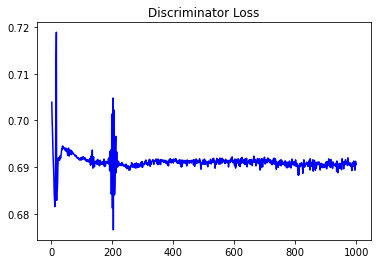

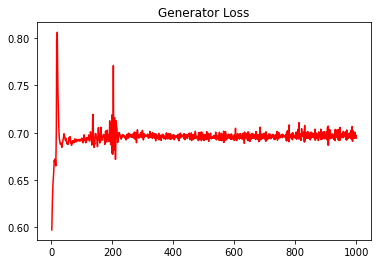

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10825908712875815


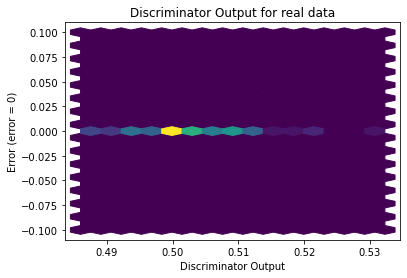

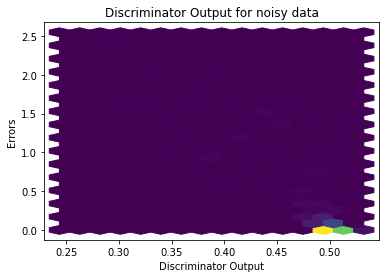

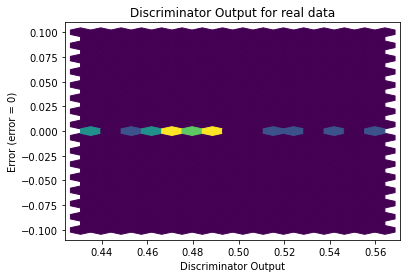

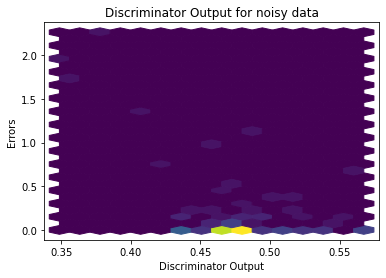

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


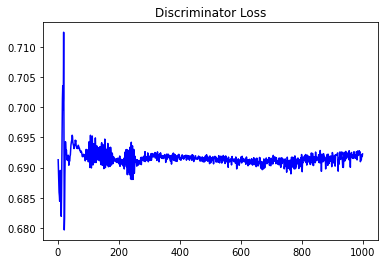

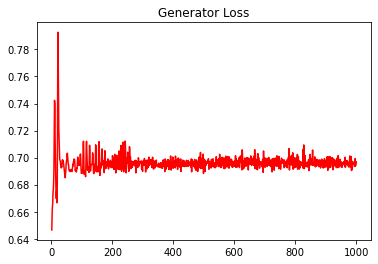

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07998956604085293


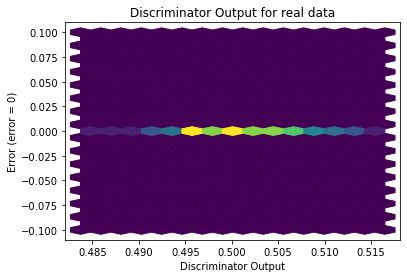

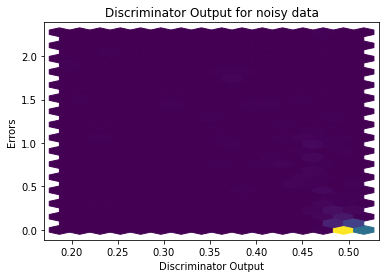

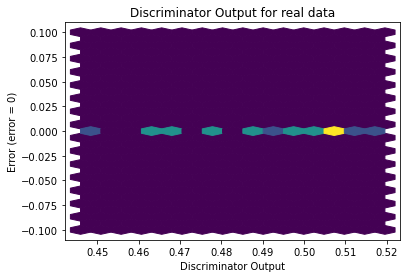

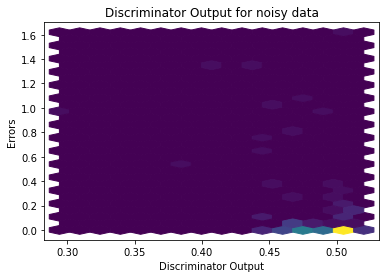

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9510]], requires_grad=True)
